In [241]:
!pip install scikit-learn

In [242]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [243]:
df = pd.read_csv('vehicles.csv')
df.head(5)

,Age,Gender,Income,Favorite Transport
0,5,female,NaN,bicycle
1,8,male,NaN,scooter
2,10,female,NaN,bicycle
3,14,male,NaN,metro
4,16,male,NaN,metro


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 26 non-null     int64  
 1   Gender              26 non-null     object 
 2   Income              20 non-null     float64
 3   Favorite Transport  26 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 964.0+ bytes


In [245]:
df.value_counts('Favorite Transport')

Favorite Transport
car           9
metro         4
taxi          4
scooter       4
helicopter    3
bicycle       2
Name: count, dtype: int64

In [246]:
df.isnull().sum()

Age                   0
Gender                0
Income                6
Favorite Transport    0
dtype: int64

In [247]:
df['Income'].fillna(0.0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6       200.0
7       500.0
8       300.0
9       800.0
10     3000.0
11     5000.0
12     7000.0
13     9000.0
14     3000.0
15     6000.0
16     8000.0
17     1300.0
18     1400.0
19     4000.0
20     5500.0
21     6500.0
22    20000.0
23     2500.0
24    25000.0
25    30000.0
Name: Income, dtype: float64

In [248]:
df['Income'] = df['Income'].fillna(0.0)
df.head(7)

,Age,Gender,Income,Favorite Transport
0,5,female,0.0,bicycle
1,8,male,0.0,scooter
2,10,female,0.0,bicycle
3,14,male,0.0,metro
4,16,male,0.0,metro
5,18,female,0.0,metro
6,20,male,200.0,scooter


In [249]:
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(df['Gender'])
df['Gender'] = label_encoded
df.head(7)

,Age,Gender,Income,Favorite Transport
0,5,0,0.0,bicycle
1,8,1,0.0,scooter
2,10,0,0.0,bicycle
3,14,1,0.0,metro
4,16,1,0.0,metro
5,18,0,0.0,metro
6,20,1,200.0,scooter


## Train model

In [250]:
X = df.drop(columns='Favorite Transport')
y = df['Favorite Transport']

In [251]:
model = DecisionTreeClassifier()

In [252]:
model.fit(X, y)

DecisionTreeClassifier()

In [253]:
test_df = pd.DataFrame({
    'Age': [12, 20],
    'Gender': [0, 1],
    'Income': [200, 1000]
})

In [254]:
model.predict(test_df)

array(['bicycle', 'metro'], dtype=object)

## Export to dot file

In [255]:
tree.export_graphviz(model, out_file='decision_tree_model.dot', filled=True, feature_names=['Age', 'Gender', 'Income'],
                     class_names=sorted(y.unique()))

## Creating Charts. Visual evaluating

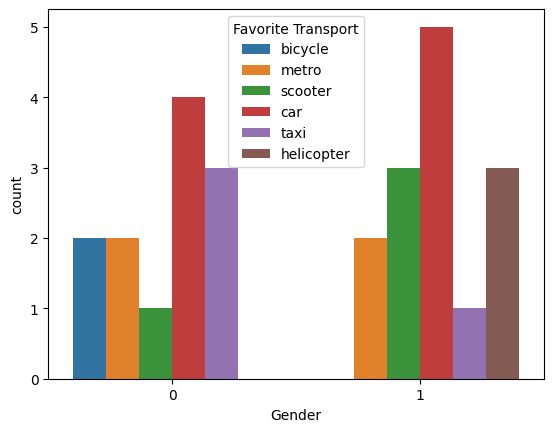

In [256]:
sns.countplot(x=df['Gender'], hue=df['Favorite Transport'])
plt.show()

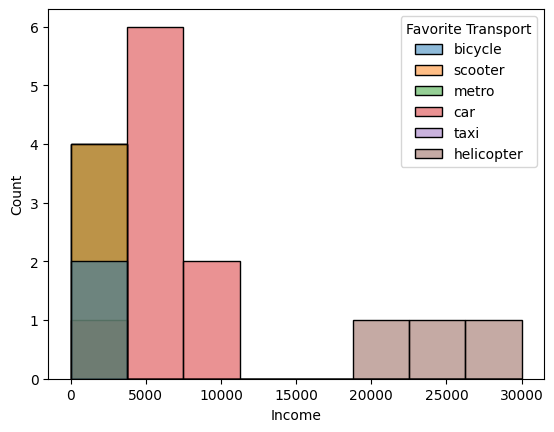

In [257]:
sns.histplot(x=df['Income'], hue=df['Favorite Transport'])
plt.show()

## Evaluating Model Accuracy

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Train shape', X_train.shape)
print('Test shape', X_test.shape)
print('Source data shape', X.shape)

Train shape (20, 3)
Test shape (6, 3)
Source data shape (26, 3)


In [259]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
model_score = accuracy_score(y_test, predictions)
print('Model score', model_score)

Model score 0.6666666666666666
